## Dimensionality Reduction
#### by **Ivan Alducin**
<p><img src="https://miro.medium.com/max/750/1*QinDfRawRskupf4mU5bYSA.png" width="750"/></p>

## Introducción

El <b>Análisis de Componentes Principales</b> es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta de visualización, filtrado de ruido, extracción e ingeniería de características, y mucho más.
Después de una breve discusión conceptual del algoritmo PCA, veremos un par de ejemplos de estas aplicaciones adicionales.

Considere lo siguiente:

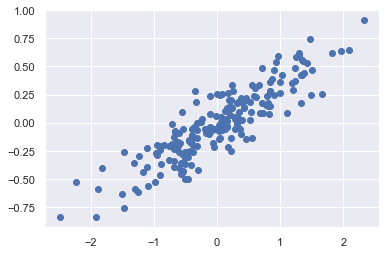

In [2]:
# Importa Numpy, Matplotlib y Seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión
sns.set()
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.show()

A simple vista, está claro que existe una relación casi lineal entre las variables <i>X</i> e <i>Y</i>.
Aquí, en lugar de intentar *predecir* los valores de y a partir de los valores de x, el problema es intentar conocer la *relación* entre estos valores. En el Análisis de Componentes Principales, esta relación se cuantifica encontrando una lista de los *ejes principales* en los datos y usando esos ejes para describir el conjunto de datos.
Usando el estimador `PCA` de Scikit-Learn, podemos calcular esto de la siguiente manera:

In [3]:
# Importa el modulo PCA de sklearn
from sklearn.decomposition import PCA

# Instancia un PCA de dos componentes
pca = PCA(n_components=2)

# Ajusta a los datos de X
pca.fit(X)

PCA(n_components=2)

In [4]:
# Imprime los componentes del modelo
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
# Imprime la varianza explicada
print(pca.explained_variance_)

[0.7625315 0.0184779]


## Componentes y Varianza
<p>Para ver qué significan estos números, visualicémoslos como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector y la "varianza explicada" para definir la longitud al cuadrado del vector. Estos vectores representan los <i>ejes principales</i> de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyectan sobre ese eje. La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.
    
Esta transformación de ejes de datos a ejes principales es una *transformación afín*, lo que básicamente significa que está compuesta por una traslación, rotación y escala uniforme. Si bien este algoritmo para encontrar componentes principales puede parecer solo una curiosidad matemática, resulta tener aplicaciones de gran alcance en el mundo del aprendizaje automático y la exploración de datos.</p>

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

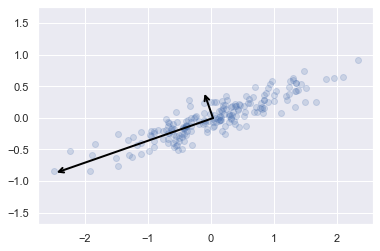

In [6]:
# Función auxiliar para visualizar los componentes principales
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Grafico de Componentes
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

## Reducción de dimensionalidad
<p>El uso de PCA para la reducción de dimensionalidad implica eliminar a uno o más de los componentes principales más pequeños, lo que da como resultado una proyección de menor dimensión de los datos que conserva la varianza máxima de los datos. Siguiendo con lo anterior, hagamos uso de exte concepto de reducción de dimensionalidad:</p>

In [4]:
# Instancia un PCA con un Componente
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

<p>Los datos transformados se han reducido a una única dimensión.Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y trazarlos junto con los datos originales.

En la siguiente grafica podemos observar que los puntos claros son los datos originales, mientras que los puntos oscuros son la versión proyectada.
Esto deja en claro lo que significa una reducción de dimensionalidad de PCA: la información a lo largo del eje o ejes principales menos importantes se elimina, dejando solo el (los) componente (s) de los datos con la varianza más alta.
La fracción de varianza que se corta (proporcional a la extensión de puntos alrededor de la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50%, la relación general entre los puntos de datos se conserva en su mayoría.</p></p>

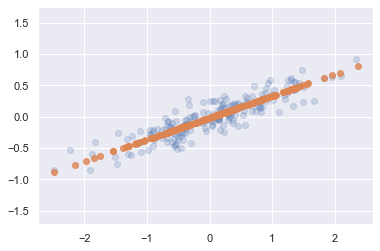

In [5]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## ¿Te acuerdas de MNIST?
<p><p>El set de datos <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> como recordarás contiene información sobre digitos divididos en pixeles, el conjunto que veremos aqui es una pequeña variación del que vimos en el Capitulo de <i>Aprendizaje Supervisado</i>, la diferencia es que aqui se incluyen mas pixeles y por tanto las imagenes son de mayor resolución. 
    
En otras palabras, tienen un mayor número de dimensiones. La exploración visual de los datos puede convertirse en un desafío y, la mayoría de las veces, incluso prácticamente imposible de hacer manualmente. Sin embargo, esta exploración visual es increíblemente importante en cualquier problema relacionado con los datos. Por lo tanto, es clave comprender cómo visualizar conjuntos de datos de alta dimensión. Esto se puede lograr utilizando técnicas conocidas como reducción de dimensionalidad. Ya hemos visto una: <i>PCA</i>, pero también revisaremos otra técnica llamada <i>t-SNE</i>.</p>

In [13]:
# Importa Pandas
import pandas as pd

# Importa el archivo "MNIST.csv"
df = pd.read_csv('MNIST.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [14]:
# Crea conjunto de variables independientes (dimensiones)
X = df.drop('label', axis=1)

# Crea la variable objetivo (label)
y = df['label']

In [15]:
# Guarda el nombre de las columnas del conjunto de variables independientes
#cols = ['pixel' + str(i) for i in range(data.shape[1])]
cols = X.columns
cols

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [25]:
arr = np.array([1, 2, 3, 4, 5, 10])
np.random.shuffle(arr)
print(arr)
print(np.random.permutation(arr))

[ 2  3 10  5  4  1]
[ 1 10  2  5  3  4]


<Figure size 432x288 with 0 Axes>

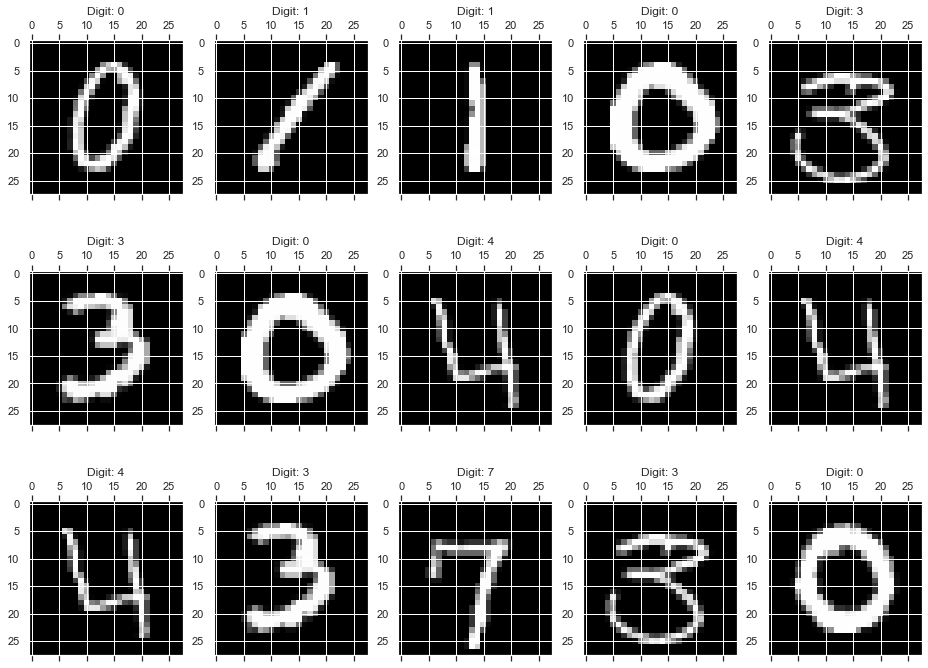

In [19]:
# Define una semilla aleatoria para poder reproducir los resultados
np.random.seed(100)

# Seleccionar una muestra aleatoria del conjunto de datos de la variable objetivo (Conviertelo a un arreglo)
subset = y.sample(15).to_numpy()

# Visualizar los digitos de la muestra
plt.gray()
fig = plt.figure(figsize=(16,12))
for i in range(0, len(subset)):
    ax = fig.add_subplot(3,5, i+1, title="Digit: {}".format(str(df.loc[subset[i],'label'])) )
    ax.matshow(df.loc[subset[i], cols].values.reshape((28,28)).astype(float))
plt.show()

## PCA  

<p>Las imágenes son esencialmente imágenes de 28 por 28 píxeles y, por lo tanto, tienen un total de 784 "dimensiones", cada una con el valor de un píxel específico.
Lo que podemos hacer es reducir drásticamente el número de dimensiones mientras tratamos de retener la mayor cantidad de "variación" en la información como sea posible. Aquí es donde llegamos a la reducción de dimensionalidad. La documentación oficial de <code>sklearn</code> la podrás enocntrar en el siguiente <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">link</a>.</p>

In [20]:
# Importa los modulos necesarios
from sklearn.decomposition import PCA

# Instancia un PCA
pca = PCA(n_components=2)

# Entrena el algoritmo
pca_result = pca.fit_transform(X.values)

# Define los componentes
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

# Variación de cada componente
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09748938 0.07160266]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

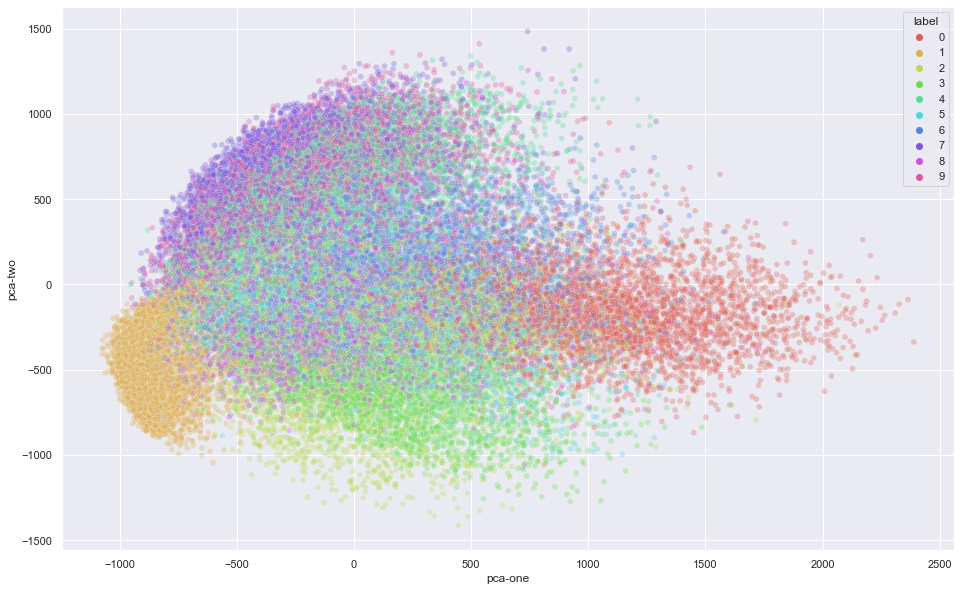

In [21]:
# Grafico PCA
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", 
    y="pca-two",
    hue="label",
    data=df,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

## Elección del número de Componentes  

<p>Una parte vital del uso de PCA en la práctica es la capacidad de estimar cuántos componentes se necesitan para describir los datos.
    Esto se puede determinar observando la relación de varianza explicada <i>acumulada</i> en función del número de componentes:</p>

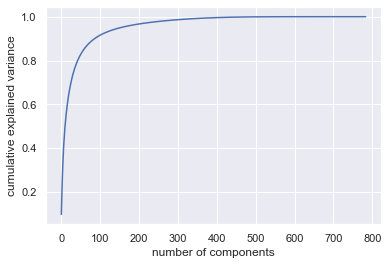

In [22]:
# Varianza explicada por número de componentes
pca = PCA().fit(X.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## t-SNE
<p>En el gráfico anterior, podemos ver que los dos componentes definitivamente contienen cierta información releveante, especialmente para ciertos dígitos, pero claramente no lo suficiente como para diferenciarlos a todos. Afortunadamente, existe otra técnica que podemos utilizar para reducir el número de dimensiones que puede resultar más útil.
    
<b>t-Distributed Stochastic Neighbor Embedding</b> (t-SNE) es otra técnica para la reducción de la dimensionalidad y es particularmente adecuada para la visualización de conjuntos de datos de alta dimensión. A diferencia de la PCA, no es una técnica determinista sino probablística. El <a href="https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf">documento de investigación</a> original describe el funcionamiento de t-SNE como: <i>“t-SNE minimiza la divergencia entre dos distribuciones: una distribución que mide las similitudes por pares de los objetos de entrada y una distribución que mide las similitudes por parejas de los puntos de baja dimensión correspondientes en la integración”</i></p>

In [23]:
# Importa los modulos necesarios
from sklearn.manifold import TSNE

# Para mejorar el rendimiento de nuestro procesador, vamos a correr el algoritmo con una muestra de 10,000
N = 10000

# Vamos a crear un subconjunto aleatorio con el tamaño definido de la muestra
subset = df.sample(N)

In [24]:
# Importar modulo time
import time

# Definir un cronometro (Vamos a medir el tiempo de procesamiento)
time_start = time.time()

# Instancia un t-SNE
tsne = TSNE(n_components=2, 
            perplexity=40, 
            n_iter=300,
            verbose=1)

# Entrena el alogoritmo
tsne_results = tsne.fit_transform(subset.values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 3.110s...
[t-SNE] Computed neighbors for 10000 samples in 179.022s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 467.864480
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.171532
[t-SNE] KL divergence after 300 iterations: 2.810187
t-SNE done! Time elap

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

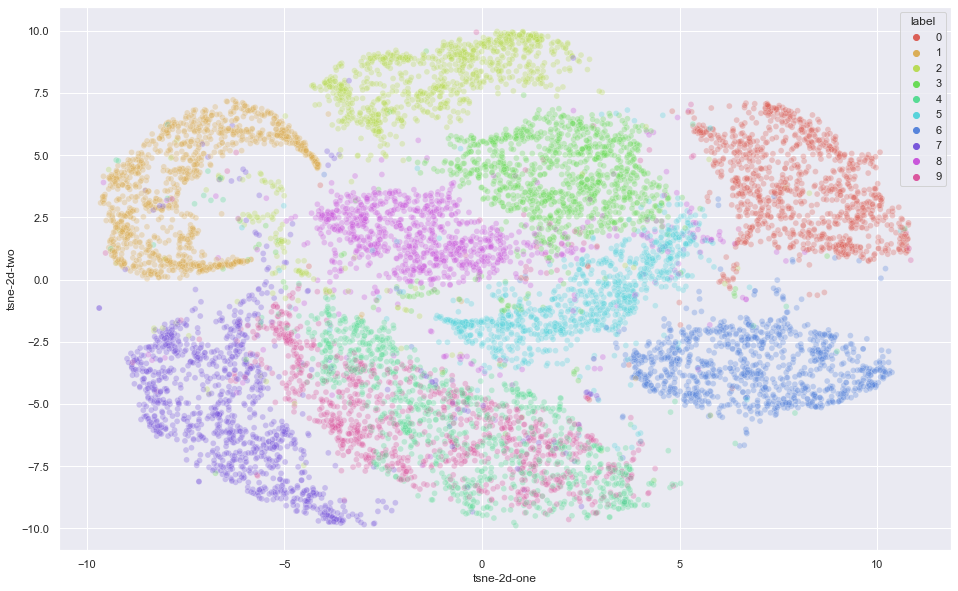

In [25]:
# Definimos los ejes
subset['tsne-2d-one'] = tsne_results[:,0]
subset['tsne-2d-two'] = tsne_results[:,1]

# Grafico t-SNE
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=subset,
    legend="full",
    alpha=0.3
)

## Capital Asset Pricing Model (CAPM)

El Modelo de fijación de precios de activos de capital (CAPM) es un marco famoso para fijar el precio de los rendimientos de un activo como una acción, con muchas conexiones interesantes con la teoría moderna de la cartera.

Antes de profundizar en los detalles del CAPM, es importante comprender la noción de activos libres de riesgo y el factor de mercado. Un activo libre de riesgo es esencialmente un activo que puede brindarle rendimientos prácticamente sin riesgo (por ejemplo, un bono del gobierno). En cambio, el factor de mercado monitorea el estado del mercado de valores en general en su conjunto y, a menudo, se mide a través de un índice como el S&P500. En términos generales, el mercado en general es más volátil / arriesgado que los bonos del gobierno, pero también proporciona más rendimientos a los inversores. Con esas definiciones en mente, veamos el concepto de Security Market Line (SML) de CAPM. En la práctica, SML descompone los rendimientos de una acción $r_i$ en tres factores principales:
- $r_f$: retorno sin riesgo
- $\beta_i * (r_m-r_f)$: rendimiento del factor de mercado
- $\epsilon_i$: retorno idiosincrásico

La intuición detrás de esta ecuación es que:

1. el rendimiento de una acción debe ser al menos igual al rendimiento del activo libre de riesgo (de lo contrario, ¿por qué asumir el riesgo adicional en primer lugar?)
2. el rendimiento del activo también se explica por el factor de mercado, que es capturado por el término ($r_M-r_f$) (mide el exceso de rendimiento del mercado con respecto al activo libre de riesgo) y $\beta_i$ (mide el grado al que el activo se ve afectado por el factor de mercado).
3. el rendimiento de una acción también se ve afectado por factores idiosincrásicos, que son factores específicos de la acción (por ejemplo, la publicación de ganancias de una acción afecta solo a esa acción individual, pero no al mercado en general).

Para este ejemplo veamos la lista de las empresas que se encuentran en el <a href="http://en.wikipedia.org/wiki/List_of_S%26P_500_companies">S&P500</a>

<img src="https://www.investopedia.com/thmb/FPwFDBwcVE3MfTu257rewqTrmF8=/590x359/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/capm3-5bfd6fa3c9e77c0051d504b2" width="500"/>

In [ ]:
!pip install yfinance
!pip install bs4

In [26]:
# Importar librerías
import yfinance as yf
import bs4 as bs
import requests

# Web Scrapping de las empresas que pertenecen al S&P500
def extract_data_wikipedia():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    arr = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            arr.append(ticker.replace('\n','')) 
    return arr

sp500 = extract_data_wikipedia()
sp500[0:10]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES']

In [27]:
# Descarga de precios de cierre de las acciones de las empresas del S&P500
prices = yf.download(sp500, start='2020-01-01', end='2021-01-01', threads=False)['Adj Close'] 

[*********************100%***********************]  503 of 503 completed

1 Failed download:
- OGN: Data doesn't exist for startDate = 1577858400, endDate = 1609480800


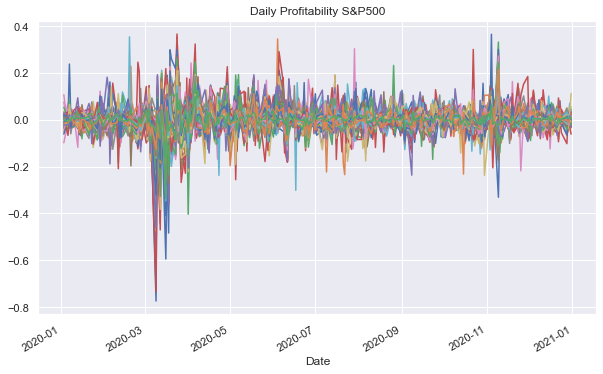

In [28]:
# Gráfico de Rendimientos diarios
rs = prices.apply(np.log).diff()
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Profitability S&P500')
plt.show()

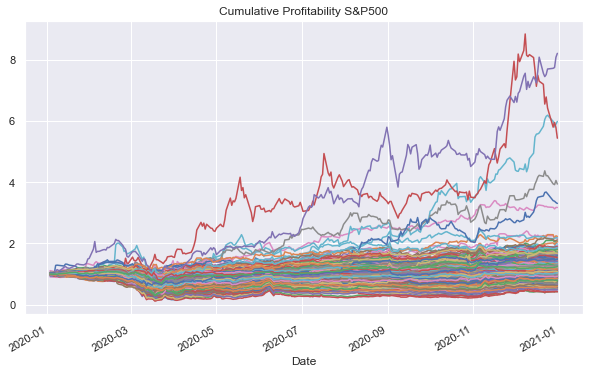

In [29]:
# Gráfico de Rendimientos acumulados
cum = rs.cumsum().apply(np.exp)
cum.plot(figsize=(10,6), 
         grid=True,
         legend=0,
         title='Cumulative Profitability S&P500')
plt.show()

## PCA y el Factor de Mercado

<p>Los gráficos anteriores muestran los rendimientos diarios y los rendimientos acumulados de las 500 acciones de empresas en el <i>S&P500</i> de todo el año 2020. La cantidad de datos puede parecer bastante abrumadora, así que procesémoslos a través de PCA calculando el primer componente principal de los rendimientos diarios. La siguiente figura muestra los valores del primer componente principal, que es esencialmente un vector de dimensión 500 que contiene un valor para cada una de las 500 acciones.

Hablando empíricamente, el factor de mercado es el principal impulsor de los rendimientos del mercado de valores, ya que tiende a explicar la mayoría de los rendimientos de cualquier acción en un día determinado. En otras palabras vamos a demostrar que: <b><i>Al aplicar PCA a los rendimientos diarios de las acciones, el primer componente principal se aproxima al factor de mercado.</i></b></p>

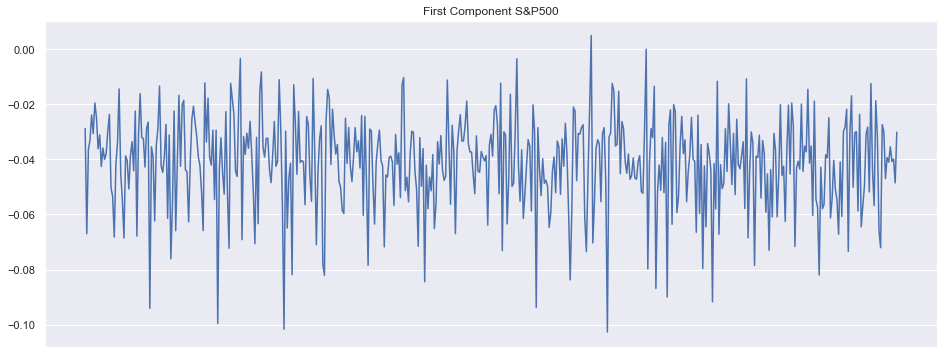

In [40]:
# Primer Componente Principal
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])
pc1.plot(xticks=[], 
         figsize=(16,6),
         title='First Component S&P500')
plt.show()

Recuerde que:
- El primer componente representa la combinación lineal de los datos de entrada que explica la mayor parte de la varianza, y 
- El principal impulsor de los rendimientos de las acciones es el factor general del mercado. Esto implica que si formulamos una cartera de acciones asignando el efectivo proporcionalmente al primer componente principal (es decir, una combinación lineal de los datos de entrada), podemos replicar los rendimientos del S&P500 aproximadamente (es decir, el principal impulsor de los rendimientos de las acciones).

<AxesSubplot:xlabel='Date'>

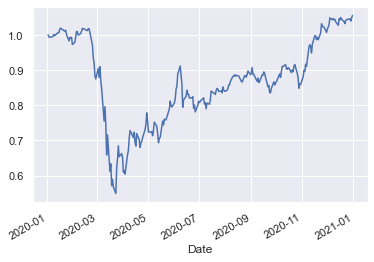

In [31]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

<i>El SPDR ETF Trust</i> (SPY) rastrea las 500 empresas del índice S&P500. Las empresas incluidas en el ETF son elegidas por un comité y, como resultado, las participaciones pueden diferir ligeramente del índice S&P500. El comité utiliza pautas para sus decisiones que incluyen liquidez, rentabilidad y equilibrio. El comité se reúne periódicamente para revisar el índice.

In [32]:
# Descarga de precios de cierre de las acciones del indicador SPY
spy_prices = yf.download("SPY", start='2020-01-01', end='2021-01-01', threads=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


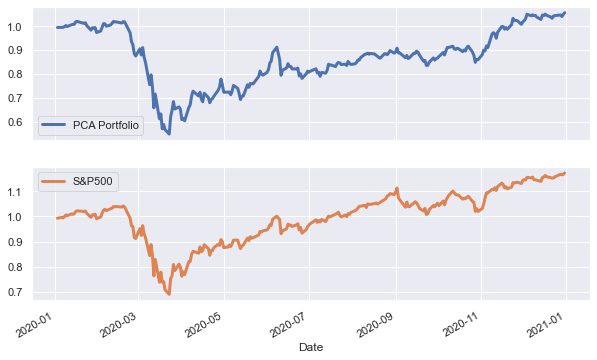

In [33]:
# Rendimiento diario del portafolio PCA vs S&P500
rs_df = pd.concat([myrs, spy_prices.apply(np.log).diff()], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

# Imprimir Gráfico 
rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, 
                                           figsize=(10,6), 
                                           grid=True, 
                                           linewidth=3);
plt.show()

Como se muestra en la figura anterior, nuestra cartera de PCA puede funcionar como un proxy del factor de mercado, que es el principal impulsor de los rendimientos de las acciones (<b>¡Y por lo tanto, explica la mayor parte de la variación!</b>). Tenga en cuenta que, aunque son similares, la cartera de PCA no replica exactamente el S&P500, ya que el S&P500 es un promedio ponderado de capitalización de mercado de las 500 acciones, mientras que las ponderaciones en la cartera de PCA están influenciadas por la varianza explicada.

Con PCA, podemos agrupar las empresas que se vieron más o menos afectadas por la pandemia de <i>COVID-19</i>, sin ningún conocimiento previo de sus fundamentos. Como probablemente sepan, 2020 fue un año complicado para el mercado de valores debido a la pandemia. Utilizando PCA, podemos analizar cómo esta pandemia afectó a las empresas de manera individual. Por ejemplo, veamos el primer componente principal y seleccionemos las acciones que tienen el mayor y menor peso, como se muestra a continuación:

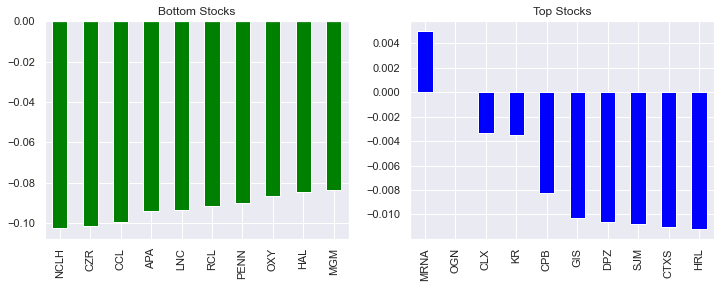

In [34]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Bottom Stocks')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Top Stocks')
plt.show()

## PCA vs S&P500

Por último, podemos formular una cartera ganadora que esté a lo largo de las 10 principales empresas de acuerdo con las ponderaciones de la PCA. Como se muestra en la figura siguiente, la cartera resultante habría tenido un desempeño significativamente mejor que el del mercado, ya que invirtió en empresas que realmente se beneficiaron de la pandemia.

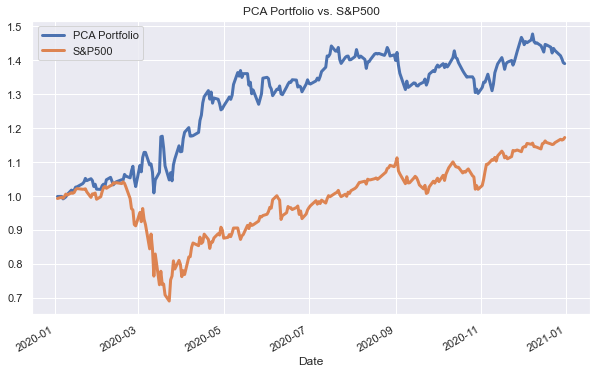

In [44]:
# Top 10 de Componenentes Principales
myrs = rs[pc1.nlargest(10).index].mean(1)

# Portafolio del Top 10 de PCA
plt.figure(figsize=(10,6))
myrs.cumsum().apply(np.exp).plot( 
                                 grid=True, 
                                 linewidth=3)

# Portafolio deL Top 10 de S&P500
spy_prices.apply(np.log).diff().cumsum().apply(np.exp).plot(
                                                            grid=True, 
                                                            linewidth=3)
plt.title('PCA Portfolio vs. S&P500')
plt.legend(['PCA Portfolio', 'S&P500'])
plt.show()